<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%205%3A%20Air%20Pollutant%20Exposure/EXPLORATION_Air_Pollutant_Exposure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **BEACO2N Notebook 5b: Air Pollutant Exposure**


Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*

### Learning Outcomes
Working through this notebook, you will learn about:
1. How CO concentrations changed during the Covid shutdown
1. Separating data in DataFrames by date
1. Extracting information from a DateTime index
1. Grouping data and creating a summary statistic


## Table of Contents
1. Notebook Setup
1. Data Manipulation
1. Visualizing CO Concentrations by Time of Day



*Note: In this notebook, there are some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

##1. Notebook Setup
In the *In Class* notebook, we explored how highways affect NO and NO2 concentrations. Now, you will get a chance to explore how the Shelter in Place (SIP) order during the COVID-19 Pandemic affected CO concentrations in the Bay Area.

#### Loading in packages

Python requires us to load packages. We'll be using the same packages we loaded in the *In Class* notebook that we went through together. However, since this is a separate notebook, we need to load them in again. **Run the cell below.**

In [ ]:
#Run this cell

# Used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation
import numpy as np
from decimal import Decimal

# Manipulating data in form of series or dataframes
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* then the one below next.

In [ ]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we would be creating.

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

**We will now look at data from a BEACO2N node located on the Exploratorium in San Francisco.**<br> Run the cell below to import the data and save it to a DataFrame called **`data`**.

In [ ]:
# Run this cell
## Loading in the BEACO2N data
filename ="https://github.com/wintera71/BEACO2N-Modules/raw/refs/heads/main/Lesson%205:%20Air%20Pollutant%20Exposure/CSVs/co_covid_data.csv"
data = pd.read_csv(filename, on_bad_lines='skip', index_col = [0], parse_dates=[0])
data = data.rename(columns={'co_corrected': 'co'})
data.head(5)

,co
timestamp,
2020-02-02 00:00:00,0.195982
2020-02-02 01:00:00,0.236079
2020-02-02 02:00:00,0.264740
2020-02-02 03:00:00,0.200332
2020-02-02 04:00:00,0.150799


Recall from the Introduction to Pandas notebook, we can use the `.head(n)` method to see the first `n` rows of our DataFrame. <br>**Q1: In the cell below, write code to display the first *10* rows of the `data` DataFrame.**

In [ ]:
## Q1 Your code here

***
##2. Data Manipulation

###2.1 Separating Data Before and After Shelter In Place Order

We now want to filter our DataFrame into **2 separate periods**: one period *before* the Shelter in Place (SIP) order, and one period *after* the SIP order was made. Let's consider the 6 weeks before the order (2/2/20-3/14/20), and the 6 weeks during the order (3/22/20-5/2/20).


**Create two dataframes:**

* **Q2:** Create DataFrame **`before_sip`**, filtering the dates of the `data` dataframe from **2020-02-02** to **2020-03-14**

* **Q3:** Create DataFrame **`during_sip`**, filtering the dates of the `data` dataframe from **2020-03-22** to **2020-05-02**

We can use the `[ ]` operator to grab rows according to their row index label. All we have to do is specify which starting index label (timestamp) we want to start at and the last index label (timestamp). We write a colon (`:`) in between the indices; this denotes to grab all of the rows in between the start and end index (*not* including the value at the end index).
>  *Hints:* <br> - The first line of code for Q2 should *start* like this:<br> `before_sip = data["2020-02-02 00:00:00" : `<br> - It can be helpful to copy and paste values from the DataFrame (above) to avoid typos!

In [ ]:
## Q2: before_sip DataFrame (dates before the SIP order)
## Your Code Here

before_sip = ...

In [ ]:
## Q3: during_sip DataFrame (dates during the SIP order)
## Your Code Here

during_sip = ...

We are interested in the **daily profile** of concentrations during these 2 time periods. To look at this, we need to add an `hour` column to each of the new DataFrames.

To achieve this, we have to access the time from the `timestamp` index column. Since our index is a `DateTime` object, it has various attributes that can give us information like date, time, timezone, etc.

If we want a certain attribute from the `DateTime`, like the date only, we can add **`.date`** after to extract *just the date*!

In our DataFrames, the *index* is the column that contains type `datetime`, so we can call `<dataframe_name>.index` to get the index (*DateTime* in our case), and then add `.date` to get the date. This is shown in the cell below:
>*We used [0:10] to show just the first 10 items of the array, since the DataFrame has 982 rows and thus the array is 982 items long.*

In [ ]:
# To find the date of our before_sip DataFrame
before_sip.index.date[0:10]

NameError: name 'before_sip' is not defined

###2.2 Extracting Hours

Now, it's your turn to practice using the attributes of `datetime`. <br>
**Q4:** **Add a column called `hour` to `before_sip` that shows the `.time` attribute.** Use the same logic as above, this time using `.time` instead of `.date`.

In [ ]:
## Q4 answer here


# If you get a "SettingWithCopyWarning", you can ignore it for now!

<ipython-input-8-e68d0b1cdeef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_sip['hour'] = before_sip.index.time


**Q5:** **Like in Q4, add a column called `hour` to `during_sip` that shows the `.time` attribute.** Use the same logic as above, this time using `.time` instead of `.date`.

In [ ]:
## Q5 answer here



# If you get a "SettingWithCopyWarning", you can ignore it for now!

<ipython-input-9-a2bfd6fd8521>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_sip['hour'] = during_sip.index.time


Let's take a look at our two DataFrames now that you've added the new column for each!<br>
*If you don't see a `hour` column, make sure you've run the cells above and that you're adding the column correctly.*

In [ ]:
before_sip.head()

,co,hour
timestamp,,
2020-02-02 00:00:00,0.162588,00:00:00
2020-02-02 01:00:00,0.206495,01:00:00
2020-02-02 02:00:00,0.237585,02:00:00
2020-02-02 03:00:00,0.178456,03:00:00
2020-02-02 04:00:00,0.129908,04:00:00


In [ ]:
during_sip.head()

,co,hour
timestamp,,
2020-03-22 00:00:00,0.178664,00:00:00
2020-03-22 01:00:00,0.158417,01:00:00
2020-03-22 02:00:00,0.155940,02:00:00
2020-03-22 03:00:00,0.125708,03:00:00
2020-03-22 04:00:00,0.142312,04:00:00


###2.3 Average CO Concentration by Hour
Let's look at the average CO concentration for each hour of the day. To do this, we can use the **`.groupby(<column_name>).mean()`** command that we used in the *In Class* notebook!

We can select whichever column we would like to group by. The column name will go inside of the `( )` after the groupby command.

**Q6: Fill in the correct column in the groupby command.**

In [ ]:
# Select the column from the before_sip dataframe to put in the command



grouped_before_sip = before_sip.groupby(...).mean()

In the cell below, we'll see the DataFrame created from the code above.<br>**Check your answer:** *There should be 24 rows (1 per hour), 2 columns (`hour` and `co`), and the values in the first row should be `00:00:00` for `hour` and `0.192829` for `co`.*

In [ ]:
grouped_before_sip

,co
hour,
00:00:00,0.192829
01:00:00,0.191321
02:00:00,0.181576
03:00:00,0.174582
04:00:00,0.170896
05:00:00,0.181906
06:00:00,0.190474
07:00:00,0.205844
08:00:00,0.206641


Let's do the same thing for the during_sip dataframe. <br>**Q7:** **Fill in the correct column in the command below (the same one as for `before_sip`!).**

In [ ]:
# Select the column from the during_sip dataframe to put in the command


grouped_during_sip = during_sip.groupby(...).mean()

**Check your answer:** *There should be 24 rows (1 per hour), 2 columns (hour and co), and the values in the first row should be 00:00:00 for hour and 0.129524 for co.*

In [ ]:
grouped_during_sip

,co
hour,
00:00:00,0.129524
01:00:00,0.127721
02:00:00,0.125267
03:00:00,0.123151
04:00:00,0.125343
05:00:00,0.132230
06:00:00,0.146646
07:00:00,0.166484
08:00:00,0.152496


***
##3. Visualizing CO Air Pollution by Time of Day

Now let's plot the data! We'll plot the CO daily profile for both before the SIP order and during the SIP order. Run the cell below and read through the code. In this section, we'll focus on analysis.

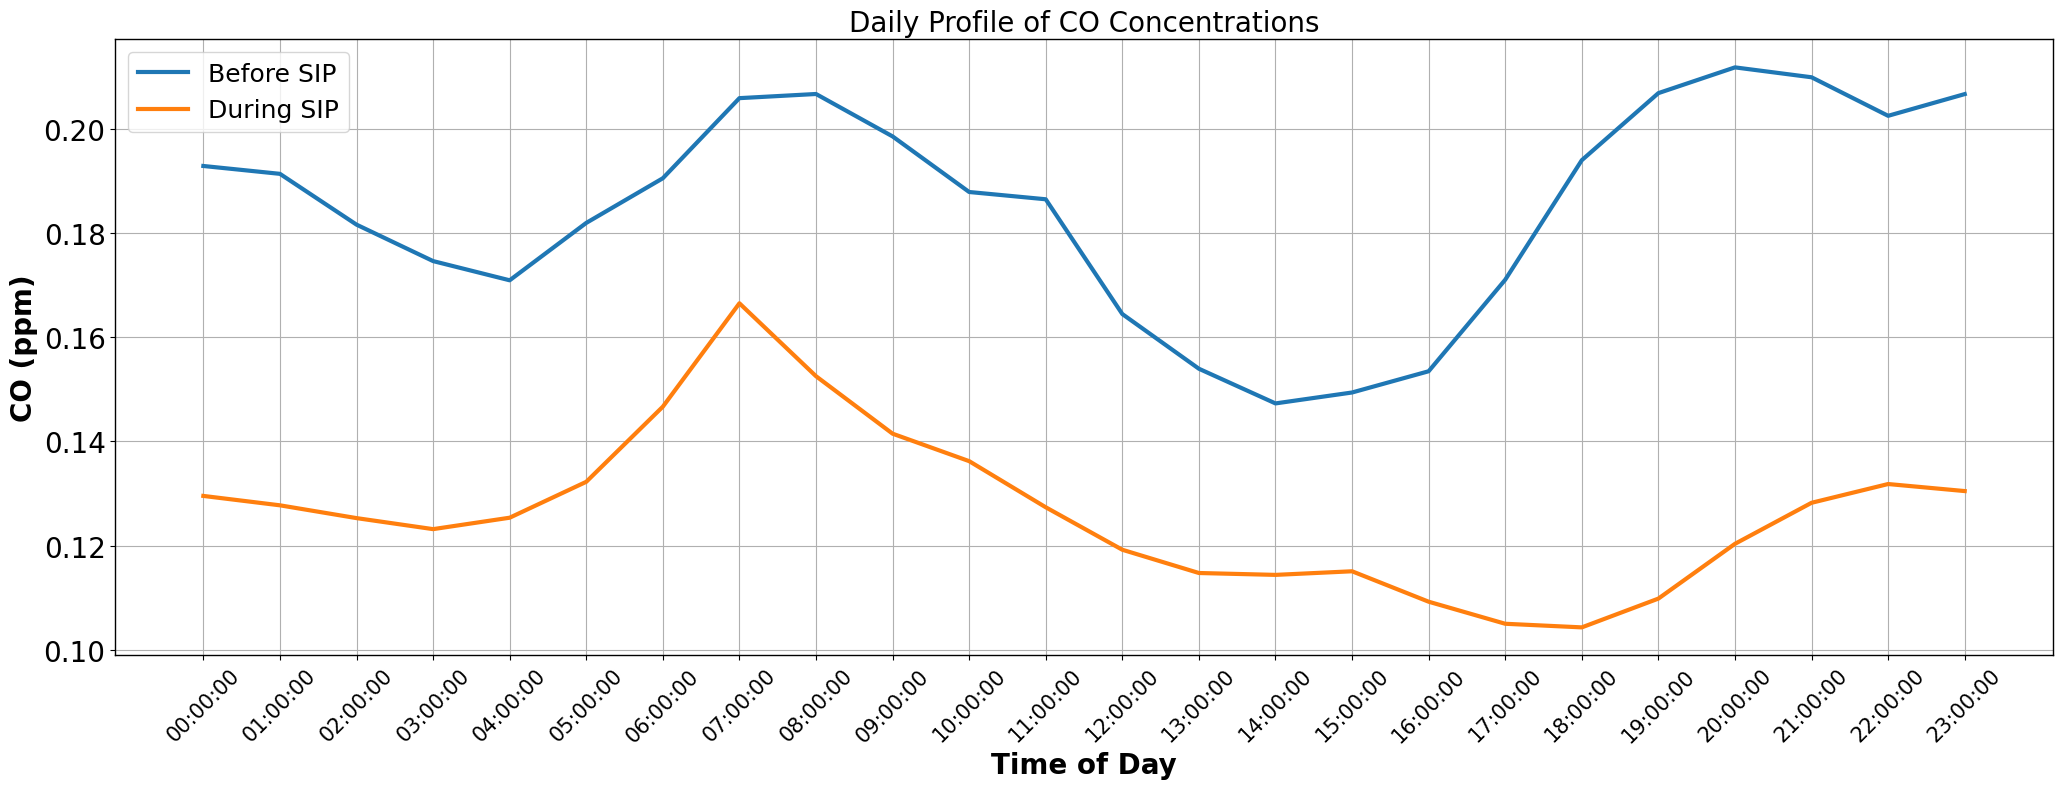

In [ ]:
plt.figure(figsize = (25, 8)) # makes size of plot

plt.plot(grouped_before_sip.index.astype(str), grouped_before_sip['co'], label= "Before SIP") # plots grouped_before_sip
plt.plot(grouped_during_sip.index.astype(str), grouped_during_sip['co'], label="During SIP") # plots grouped_during_sip

plt.legend(fontsize = 18) # specifies what legend looks like
plt.grid() # adds a grid to make your visual analyses easier and more accurate

# Adds a x-axis label
plt.xlabel("Time of Day")

# Adds a y-axis label
plt.ylabel("CO (ppm)")

# Adds a title to our line plot
plt.title("Daily Profile of CO Concentrations")

# Specifies font size of x labels and rotates labels so they don't overlap
plt.xticks(fontsize = 15, rotation = 45);

What do you observe? Look at the plot above to answer each of the following questions:<br>

> **Q8:** Are the CO values higher before or during the SIP order?


> **Q9:** What are the maximum and minimum CO values (in ppm) for both time periods?

> **Q10:** Why do you think we see this difference?

**YOUR ANSWERS HERE:** Double-click to edit this cell.<br>
*   **Q8:** (Your answer here)
*   **Q9:** (Your answer here)
*   **Q10:** (Your answer here)

**Consider this**<br> In the *In Class* and *Student Exploration* notebooks, we've explored how traffic and highways affect various pollutants. However, the effects of this pollution are not experienced equally across all communities. Use the internet to investigate: Which populations are most affected by traffic-related air pollution, and why?

**Your answer:**<br>
Double-click here and replace this text with your response.

***
##4. Conclusion
In this notebook, you learned about:
- Splitting data using timestamps and filtering
- Understanding pollutant concentrations during 2 time periods
- Using groupby to average and group data
- Analyzing multiple line plots

#### You've finished the **Air Pollutant Exposure *Student Exploration* notebook**. Good job! Congratulations on finishing the **Air Pollutant Exposure** lesson!

***
***